**The SparksFoundation- GRIP internship #OCT2023**

Task 06 : Prediction using Decision Tree Algorithm

By Suyog Subhash Ubhare
**bold text**


# **1)Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score,auc
import sklearn.metrics as metrics

# **2 Reading data**

In [3]:
iris  =pd.read_csv(r'C:\Users\dhatc/Documents/New folder/1/Task-6-Decision Tree Algorithm/Iris.csv')
print('Shape of the Dataset-->',iris.shape)
print('dtypes of the Dataset-->',iris.dtypes)
iris.head(5)

Shape of the Dataset--> (150, 6)
dtypes of the Dataset--> Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **3)Data preprocessing of Training Dataset**

**checking all the attributes for missing values.**

In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Outliers**

**Plot of Independent Numerical variable**

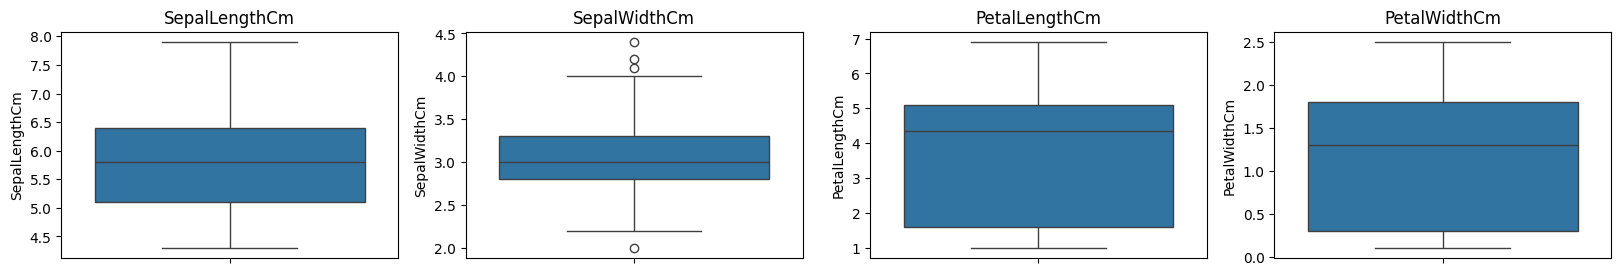

In [5]:
plt.figure(figsize=(20, 10))
X=iris.drop(['Species','Id'], axis=1)
# i: index
for i, col in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    x = iris[col]
    sns.boxplot(x)
    plt.title(col)

Observed that SepalWidthCm has outliers. To further investigate FacetGrid plot is plotted below

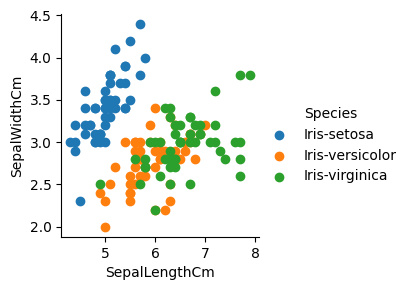

In [6]:
# Plotting species for Sepal
sns.FacetGrid(iris, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

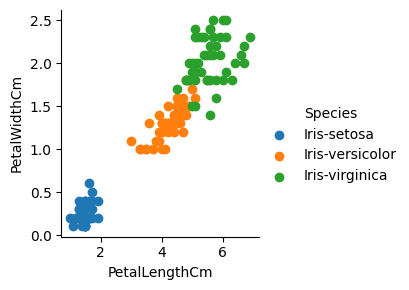

In [7]:
# Plotting species for petals
sns.FacetGrid(iris, hue="Species") \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

C:\Users\dhatc\AppData\Local\Temp\ipykernel_9820\3792965421.py:4: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  fig=sns.stripplot(x='Species',y='SepalWidthCm',data=iris,jitter=True,edgecolor='gray')


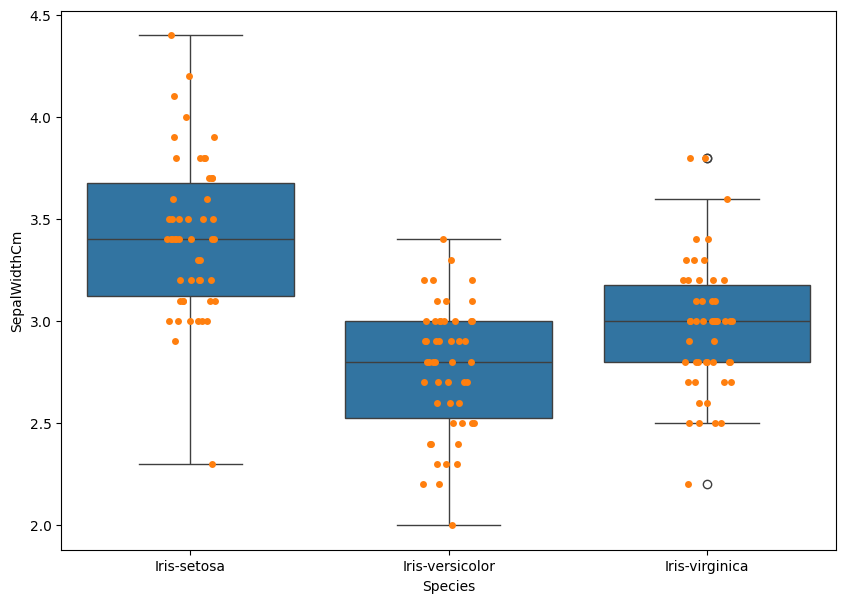

In [8]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
fig=sns.stripplot(x='Species',y='SepalWidthCm',data=iris,jitter=True,edgecolor='gray')


Observed that all the outliers are from Species 'Iris-Virginica'

**Histogram of Independent Variables**

**(b) Summary Statistics**

In [10]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


C:\Users\dhatc\AppData\Local\Temp\ipykernel_9820\3917929499.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris.corr()


<Axes: >

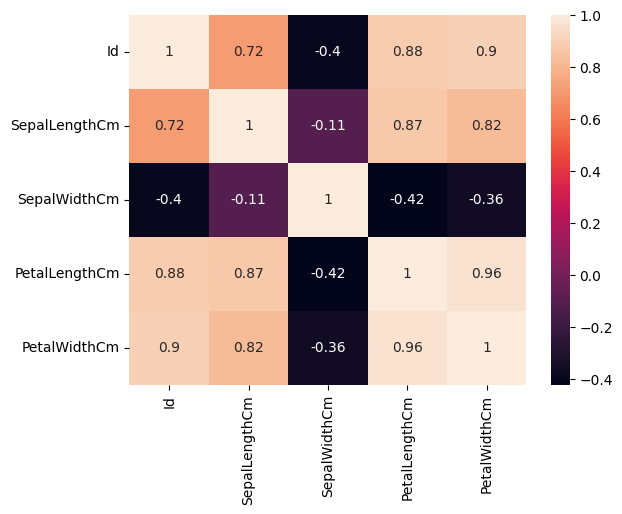

In [11]:
correlation_matrix = iris.corr()
sns.heatmap(data=correlation_matrix, annot=True)

All the Variables are higly correlated except for SepalWidthCM and it is also negatively correlated

**Exploring Independent variables**

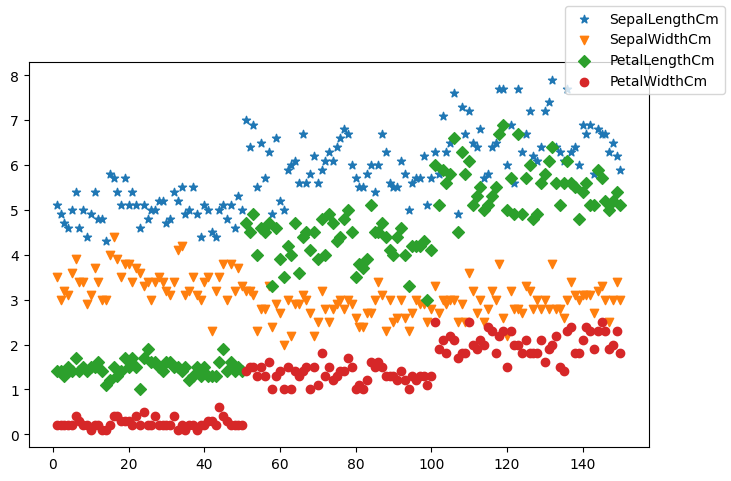

In [12]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x = iris.Id, y = iris.SepalLengthCm, marker = "*")
plt.scatter(x = iris.Id, y = iris.SepalWidthCm, marker = "v")
plt.scatter(x = iris.Id, y = iris.PetalLengthCm, marker = "D")
plt.scatter(x = iris.Id, y = iris.PetalWidthCm, marker = "o")


fig.legend(labels=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

**Exploring the Dependent variable**

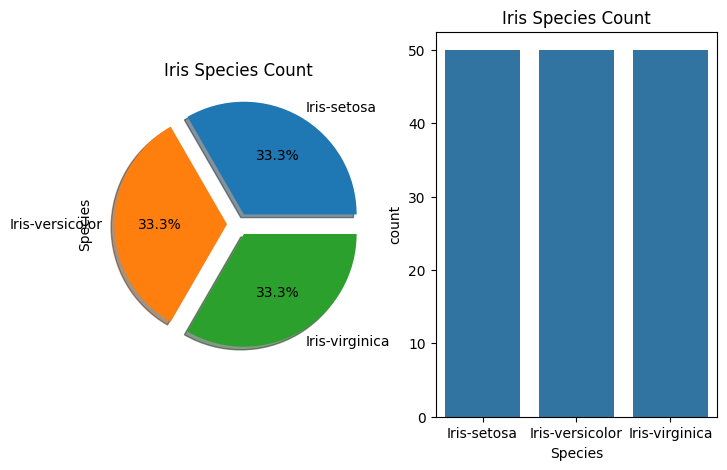

In [13]:
#sns.countplot(x='Species', data=iris)
f,ax=plt.subplots(1,2,figsize=(8,5))
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Iris Species Count')
sns.countplot(x='Species',data=iris,ax=ax[1])
ax[1].set_title('Iris Species Count')
plt.show()

All the Species are having equal number of observations

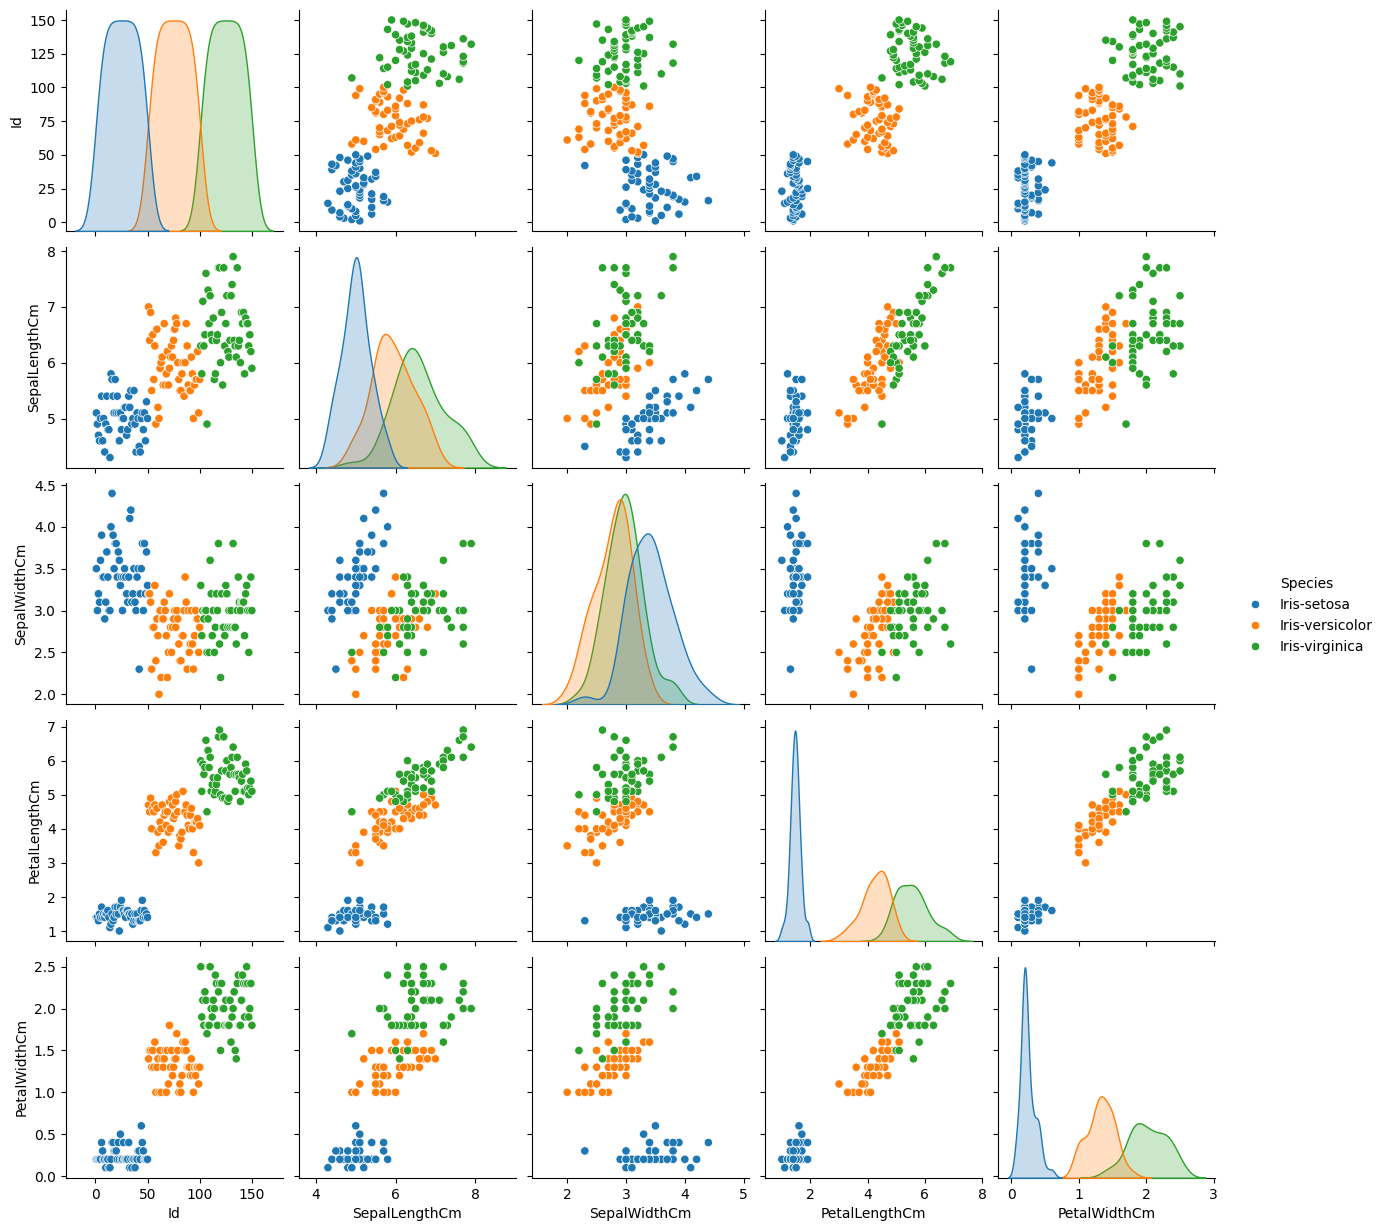

In [14]:
sns.pairplot(data=iris, hue='Species')

**Create the target and Predictor matrix:**

In [15]:
X = iris.drop(['Species','Id'],axis=1)
Y= iris['Species']

the target variable is "Species",

**Create the split test and training dataset:**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1,stratify=Y)

In [17]:
print(f"X_train shape is {X_train.shape}")
print(f"X_test shape is {X_test.shape}")

print(f"Y_train shape is {Y_train.shape}")
print(f"Y_test shape is {Y_test.shape}")

X_train shape is (112, 4)
X_test shape is (38, 4)
Y_train shape is (112,)
Y_test shape is (38,)


**Build Decision Tree model: Default parameters**

In [18]:
import sklearn.tree as tree
clf_d=tree.DecisionTreeClassifier(random_state=23)
clf_d.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=23)

**Feature Importance**

In [19]:
pd.Series(clf_d.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

PetalWidthCm     0.560702
PetalLengthCm    0.395440
SepalLengthCm    0.026000
SepalWidthCm     0.017859
dtype: float64

**Make predictions on Test dataset**

In [20]:
predictions_d = clf_d.predict(X_test)
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions_d})
#calculating probabilities of predictions
predict_prob=clf_d.predict_proba(X_test)

df.head()

,Actual,Predicted
113,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
0,Iris-setosa,Iris-setosa
11,Iris-setosa,Iris-setosa
93,Iris-versicolor,Iris-versicolor


**Performance Metrics Train data**

In [21]:
predictions_train = clf_d.predict(X_train)
print('Traning Accuarcy                                 :',clf_d.score(X_train, Y_train))
print('Accuracy score                                   :',accuracy_score(Y_train, predictions_train))
print('classification_report                            :')
print(classification_report(Y_train, predictions_train))

Traning Accuarcy                                 : 1.0
Accuracy score                                   : 1.0
classification_report                            :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       112
      macro avg       1.00      1.00      1.00       112
   weighted avg       1.00      1.00      1.00       112



**Performance Metrics Test data**

In [22]:
print('Testing Accuarcy                                 :',clf_d.score(X_test, Y_test).round(4))
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_d).round(4))
print('classification_report                            :')
print(classification_report(Y_test, predictions_d))

Testing Accuarcy                                 : 0.9737
Accuracy score                                   : 0.9737
classification_report                            :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



**Plot confusion matrix**

,Predicted Iris-setosa,"Predicted Iris-versicolor""","Predicted Iris-virginica"""
Actual Iris-setosa,12,0,0
Actual Iris-versicolor,0,13,0
"Actual Iris-virginica""",0,1,12


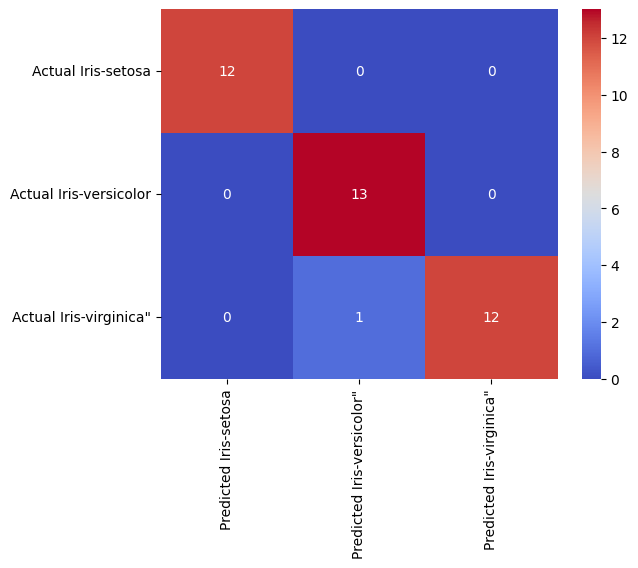

In [23]:
confusion = confusion_matrix(Y_test, predictions_d)
confusion_matrix_d = pd.DataFrame(confusion, index=['Actual Iris-setosa','Actual Iris-versicolor','Actual Iris-virginica"'], columns=['Predicted Iris-setosa','Predicted Iris-versicolor"','Predicted Iris-virginica"'])
_=sns.heatmap(confusion_matrix_d, cmap='coolwarm', annot=True)
confusion_matrix_d

**ROC Curve**

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)

def multiclass_roc_auc_plot(truth, pred, average="macro"):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes=3

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(truth[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in (range(n_classes)):
        plt.plot(fpr[i], tpr[i],
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

ROC-AUC score of the model   : 0.9805128205128205


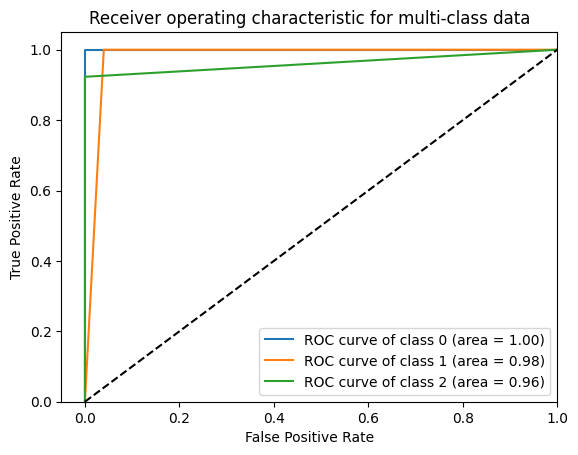

In [25]:
area_UnderCurve_d=multiclass_roc_auc_score(Y_test,predictions_d)
print('ROC-AUC score of the model   :',area_UnderCurve_d)
multiclass_roc_auc_plot(Y_test, predictions_d)

**Observations**

The higher the area under the curve the more it tells how good the classification model is at distinguishing between the classes of species.
